In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import evaluate
import re


from rouge_score import rouge_scorer
import seaborn as sns

In [10]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', True)

In [ ]:
mapping = {
"Falcon3-Instruct-10B-1epochs":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-BehaviorTree-1epochs.Q4_K_M_log.csv",
"Falcon3-Instruct-10B-3epochs":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-BehaviorTree-3epochs.Q4_K_M_log.csv",
"Falcon3-Instruct-10B-5epochs":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-BehaviorTree-5epochs.Q4_K_M_log.csv",
"Falcon3-Instruct-10B-8epochs":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-BehaviorTree-8epochs.Q4_K_M_log.csv",
"Falcon3-Instruct-10B-10epochs":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-BehaviorTree-10epochs.Q4_K_M_log.csv",
"Falcon3-Instruct-10B-prompt-eng":r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\finetuning\resultes\Falcon3-10B-Instruct-q4_k_m_log.csv",

}


dfs = []
for model, file_path in mapping.items():
    temp_df = pd.read_csv(file_path)
    temp_df["Model Name"] = model
    temp_df['Behavior Tree']= temp_df['Behavior Tree'].str.replace(r'\n|\t', ' ', regex=True)
    temp_df['Ground Truth BT'] = temp_df['Ground Truth BT'].str.replace(r'<\?xml version="1\.0" encoding="UTF-8"\?>\n', "", regex=True)
    dfs.append(temp_df)

# Concatenate all DataFrames into one final DataFrame
final_df = pd.concat(dfs, ignore_index=True)
final_df.head(2)
# Ground_Truth_df.head(2)

,SYSTEM,INSTRUCTIONS,USER COMMAND,Ground Truth BT,Prompt Type,Time,Behavior Tree,Model Name
0,"<<SYS>>You are a helpful, respectful, and honest AI assistant. Your task is to generate well-structured XML code for behavior trees based on the provided instructions.<</SYS>>","It is CRITICAL to use only the following behaviors structured as a dictionary: {CheckBattery: Condition Node: Check if the agent's battery level is above a threshold. Returns SUCCESS if above, FAILURE otherwise.; Recharge: Action Node: Initiate the charging process. Always returns SUCCESS.; NavigateTo: Action Node: Navigate to a specified location. Always returns SUCCESS.; ReportStatus: Action Node: Report the current status. Always returns SUCCESS.}. To construct a behavior tree in XML format for the following command. If any behavior outside the provided dictionary is used, output (Sorry, I can't do the task).","generate behavior tree to ""check battery level, if sufficient navigate to the target location, else recharge, and report the status after moving or recharging"". Take a step back and think deeply about the behavior you need for this command. Then think of the XML structure and the behavior you used.","<root BTCPP_format=""3"" main_tree_to_execute=""BatteryCheckTree"">\n <BehaviorTree ID=""BatteryCheckTree"">\n <Fallback>\n <Sequence>\n <CheckBattery/>\n <NavigateTo location=""{TargetLocation}""/>\n <ReportStatus message=""Arrived at target location.""/>\n </Sequence>\n <Sequence>\n <Recharge/>\n <ReportStatus message=""Recharging completed.""/>\n </Sequence>\n </Fallback>\n </BehaviorTree>\n <TreeNodesModel>\n <Condition ID=""CheckBattery"" editable=""true"">\n </Condition>\n <Action ID=""Recharge"" editable=""true"">\n </Action>\n <Action ID=""NavigateTo"" editable=""true"">\n <input_port name=""location""/>\n </Action>\n <Action ID=""ReportStatus"" editable=""true"">\n <input_port name=""message""/>\n </Action>\n </TreeNodesModel>\n</root>",zero,70.335028,"<root BTCPP_format=""3"" main_tree_to_execute=""MainTree""> <BehaviorTree name=""MainTree""> <Fallback> <Sequence> <CheckBattery/> <NavigateTo location=""target""/> </Sequence> <Sequence> <Recharge/> <ReportStatus/> </Sequence> </Fallback> </BehaviorTree> <TreeNodesModel> <Condition Node=""CheckBattery""/> <Action Node=""NavigateTo""/> <Action Node=""Recharge""/> <Action Node=""ReportStatus""/> </TreeNodesModel> </root>",Falcon3-Instruct-10B-1epochs
1,"<<SYS>>You are a helpful, respectful, and honest AI assistant. Your task is to generate well-structured XML code for behavior trees based on the provided instructions.<</SYS>>","It is CRITICAL to use only the following behaviors structured as a dictionary: {is_battery_low: Condition node: Check if the battery level is below 20%. Returns SUCCESS if low, FAILURE otherwise.; return_to_base: Action Node: Navigate the robot back to its base. Always returns SUCCESS.; continue_mission: Action Node: Continue with the current mission. Always returns SUCCESS.; recharge_battery: Action Node: Start the battery recharging process. Always returns SUCCESS}. To construct a behavior tree in XML format for the following command. If any behavior outside the provided dictionary is used, output (Sorry, I can't do the task).","generate behavior tree to ""If the battery is low, return to base and recharge; otherwise, continue with the mission"". Take a step back and think deeply about the behavior you need for this command. Then think of the XML structure and the behavior you used.","<root BTCPP_format=""3"" main_tree_to_execute=""BatteryManagement"">\n <BehaviorTree ID=""BatteryManagement"">\n <Fallback name=""Battery Check"">\n <Sequence>\n <is_battery_low/>\n <return_to_base/>\n <recharge_battery/>\n </Sequence>\n <continue_mission/>\n </Fallback>\n </BehaviorTree>\n <TreeNodesModel>\n <Condition ID=""is_battery_low""/>\n <Action ID=""return_to_base""/>\n <Action ID=""recharge_battery""/>\n <Action ID=""continue_mission""/>\n </TreeNodesModel>\n</root>",zero,66.8336

In [ ]:
# Load the evaluation metrics:
bleu_metric = evaluate.load("bleu", config_name="bleu")
rouge_metric = evaluate.load("rouge")
# meteor_metric = evaluate.load("meteor")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
import pandas as pd

# Add empty evaluation columns to final_df
final_df["bleu_score"] = None
final_df["rouge_score"] = None
# final_df["meteor_score"] = None



for idx, row in final_df.iterrows():

    prediction = [row["Behavior Tree"]]
    reference = [[row["Ground Truth BT"]]]
    
    # Compute evaluation metrics using the evaluate module.
    bleu_score = bleu_metric.compute(predictions=prediction, references=reference)["bleu"]
    rouge_score = rouge_metric.compute(predictions=prediction, references=reference)["rougeL"]
    # meteor_score = meteor_metric.compute(predictions=prediction, references=reference)["meteor"]
    
    # Save the computed scores into final_df for this row.
    final_df.loc[idx, "bleu_score"] = bleu_score
    final_df.loc[idx, "rouge_score"] = rouge_score
    # final_df.loc[idx, "meteor_score"] = meteor_score

final_df.replace([None], 0, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_6448\3935235152.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df.replace([None], 0, inplace=True)


In [36]:
# final_df

In [18]:
# Helper function to safely extract epoch number
def get_epoch_number(model_name):
    match = re.search(r"(\d+)epochs", model_name)
    if match:
        return int(match.group(1))
    return 0  # Default value for names without an epoch number


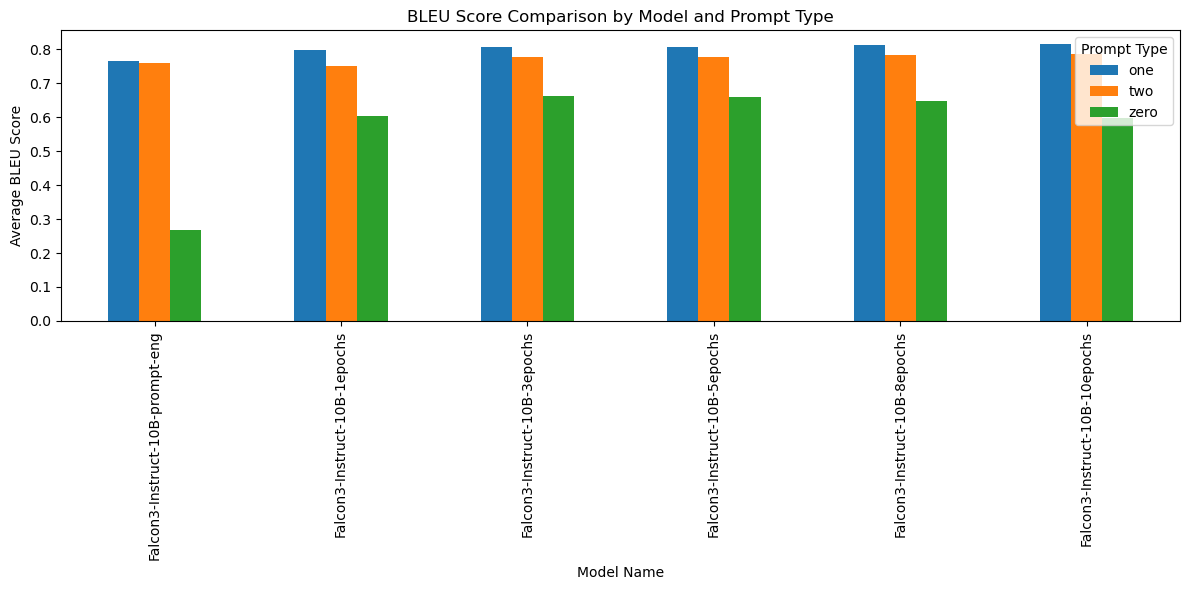

In [ ]:
pivot_bleu = final_df.groupby(["Model Name", "Prompt Type"])["bleu_score"].mean().unstack()


# 1. Extract a clean list of model names from the pivot’s index
models = list(pivot_bleu.index)



# 2. Sort them using the helper function
model_order = sorted(models, key=get_epoch_number)

# 3. Reindex your pivot to this new order
pivot_bleu_sorted = pivot_bleu.reindex(model_order)

# 4. Plot
pivot_bleu_sorted.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Model Name")
plt.ylabel("Average BLEU Score")
plt.title("BLEU Score Comparison by Model and Prompt Type")
plt.legend(title="Prompt Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


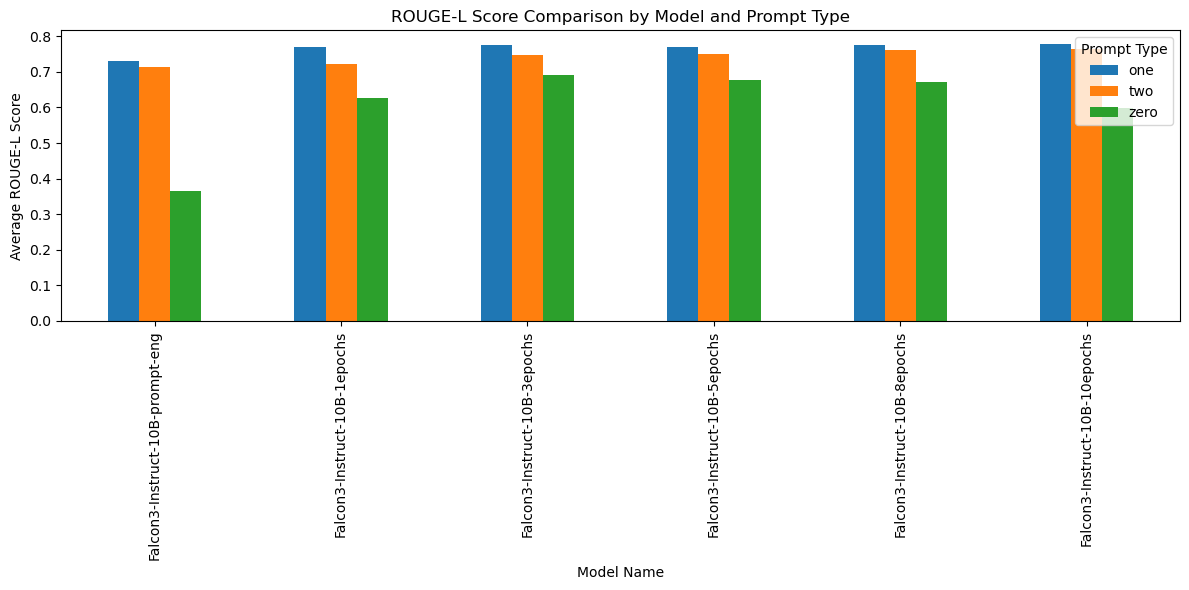

In [21]:
pivot_rouge = final_df.groupby(["Model Name", "Prompt Type"])["rouge_score"].mean().unstack()

# 1. Extract a clean list of model names from the pivot’s index
models = list(pivot_rouge.index)

# 2. Sort them using the helper function
model_order = sorted(models, key=get_epoch_number)

# 3. Reindex your pivot to this new order
pivot_rouge_sorted = pivot_rouge.reindex(model_order)

# 4. Plot
pivot_rouge_sorted.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Model Name")
plt.ylabel("Average ROUGE-L Score")
plt.title("ROUGE-L Score Comparison by Model and Prompt Type")
plt.legend(title="Prompt Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




In [23]:
import pandas as pd
import xml.etree.ElementTree as ET
import re

# Structural wrappers that we do not check against allowed_node_tags
structural_tags = {"root", "BehaviorTree", "TreeNodesModel", "Sequence", "Fallback", "Action", "Condition","input_port","output_port","ControlNode"}

def check_xml_syntax(xml_str, allowed_node_tags):
    errors = []

    # Ensure the input is a string.
    if not isinstance(xml_str, str):
        errors.append("XML data is not a string.")
        return errors

    # Check that XML starts with <root ...> and ends with </root>
    stripped = xml_str.strip()
    if not stripped.startswith("<root"):
        errors.append("XML does not start with <root> tag.")
    if not stripped.endswith("</root>"):
        errors.append("XML does not end with </root> tag.")

    # Try parsing the XML
    try:
        root = ET.fromstring(xml_str)
    except ET.ParseError as e:
        errors.append(f"XML parsing error: {e}")
        return errors  # Stop further checking if XML is not well-formed.

    # Check that root tag is "root"
    if root.tag != "root":
        errors.append(f"Root tag is '{root.tag}' instead of 'root'.")

    # Check for main_tree_to_execute attribute on the root element
    main_tree = root.attrib.get("main_tree_to_execute")
    if main_tree is None:
        errors.append("Attribute 'main_tree_to_execute' not found in <root> element.")
    else:
        # Check that there is a BehaviorTree element with an ID matching main_tree_to_execute.
        behavior_trees = root.findall("BehaviorTree")
        bt_found = any((bt.attrib.get("ID") == main_tree) or (bt.attrib.get("name") == main_tree)for bt in behavior_trees)
        if not bt_found:
            errors.append("No <BehaviorTree> element with ID matching 'main_tree_to_execute' found.")

    # Check for the existence of the <TreeNodesModel> element.
    tn_model = root.find("TreeNodesModel")
    if tn_model is None:
        errors.append("No <TreeNodesModel> element found.")

    # Recursively check for allowed tags in the XML (skip structural wrappers)
    def local_name(tag):
        # if the tag comes in as "{uri}localname", drop the "{uri}"
        return tag.split('}', 1)[-1] if '}' in tag else tag

    for elem in root.iter():
        tag = local_name(elem.tag)
        if tag in structural_tags:
            continue
        if tag not in allowed_node_tags:
            errors.append(f"Disallowed element tag found: '{tag}'.")

    return errors

def check_all_xml_rows(df, xml_column="Behavior Tree"):
    results = []
    # Loop over each row in the DataFrame.
    for idx, row in df.iterrows():
        xml_value = row[xml_column]
        # Pass the allowed tags of the current row (not the whole column)
        errors = check_xml_syntax(xml_value, row["allowed tags"])
        results.append(errors)
    return results

# Assuming final_df is already defined
df = pd.DataFrame(final_df)

# Define a regex pattern to extract the word immediately preceding "Action Node" or "Condition node"
pattern = re.compile(r"[`']?(\w+)[`']?\s*:\s*(?:Action Node|Condition node|Condition|Action)", flags=re.IGNORECASE)

# Correctly create the "allowed tags" column by applying the regex to each row's INSTRUCTIONS field.
df["allowed tags"] = df["INSTRUCTIONS"].apply(lambda x: pattern.findall(x))

# Apply the syntax check over the DataFrame.
df["Syntax_Errors"] = check_all_xml_rows(df, xml_column="Behavior Tree")


In [30]:
# df

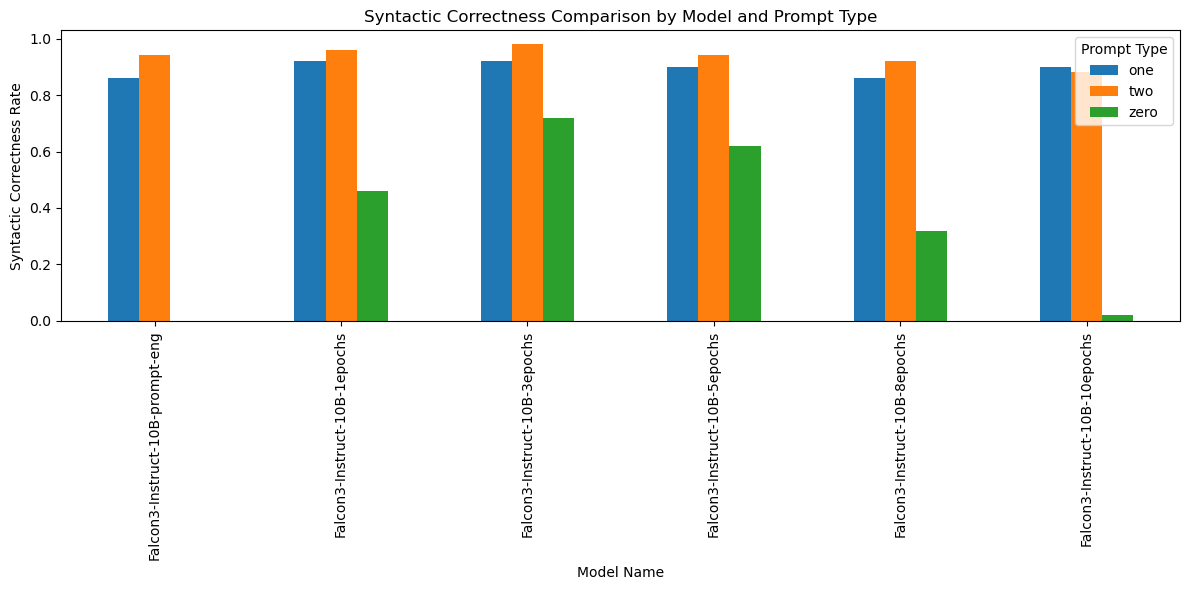

In [24]:

# Create a boolean column: True if XML is syntactically correct (i.e. Syntax_Errors is empty)
df["syntax_correct"] = df["Syntax_Errors"].apply(lambda errors: len(errors) == 0)


# --- Create a pivot table for the average syntactic correctness rate (0 to 1) ---
# The average of True/False values (with True = 1, False = 0) gives the proportion of correct entries.
pivot_syntax = df.groupby(["Model Name", "Prompt Type"])["syntax_correct"].mean().unstack()


# 1. Extract the unsorted model names
models = list(pivot_syntax.index)

# 2. Sort them using the helper function
model_order = sorted(models, key=get_epoch_number)

# 3. Reindex the pivot
pivot_syntax_sorted = pivot_syntax.reindex(model_order)

# 4. Plot
pivot_syntax_sorted.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Model Name")
plt.ylabel("Syntactic Correctness Rate")
plt.title("Syntactic Correctness Comparison by Model and Prompt Type")
plt.legend(title="Prompt Type")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()






In [25]:
# 1. Concatenate the four pivots into one table
combined = pd.concat(
    {
        'BLEU':   pivot_bleu,
        'ROUGE':  pivot_rouge,
        # 'METEOR': pivot_meteor,
        'Syntax': pivot_syntax
    },
    axis=1
)

# 2. (Optional) Flatten the MultiIndex columns to simple names
combined.columns = [f"{metric}_{prompt}" for metric, prompt in combined.columns]

# 3. View the result
combined

,BLEU_one,BLEU_two,BLEU_zero,ROUGE_one,ROUGE_two,ROUGE_zero,Syntax_one,Syntax_two,Syntax_zero
Model Name,,,,,,,,,
Falcon3-Instruct-10B-10epochs,0.814500,0.784652,0.598256,0.777761,0.763271,0.597613,0.90,0.88,0.02
Falcon3-Instruct-10B-1epochs,0.798000,0.751733,0.603633,0.769131,0.721457,0.626158,0.92,0.96,0.46
Falcon3-Instruct-10B-3epochs,0.805382,0.777332,0.662528,0.774259,0.748300,0.691669,0.92,0.98,0.72
Falcon3-Instruct-10B-5epochs,0.805583,0.775658,0.660493,0.770369,0.751332,0.677394,0.90,0.94,0.62
Falcon3-Instruct-10B-8epochs,0.810695,0.782930,0.645949,0.775389,0.762484,0.670143,0.86,0.92,0.32
Falcon3-Instruct-10B-prompt-eng,0.764820,0.760569,0.267020,0.731149,0.714914,0.366316,0.86,0.94,0.00


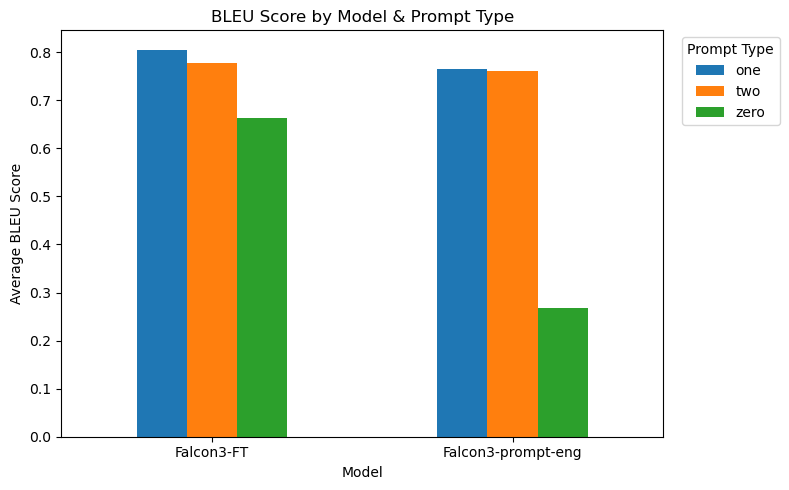

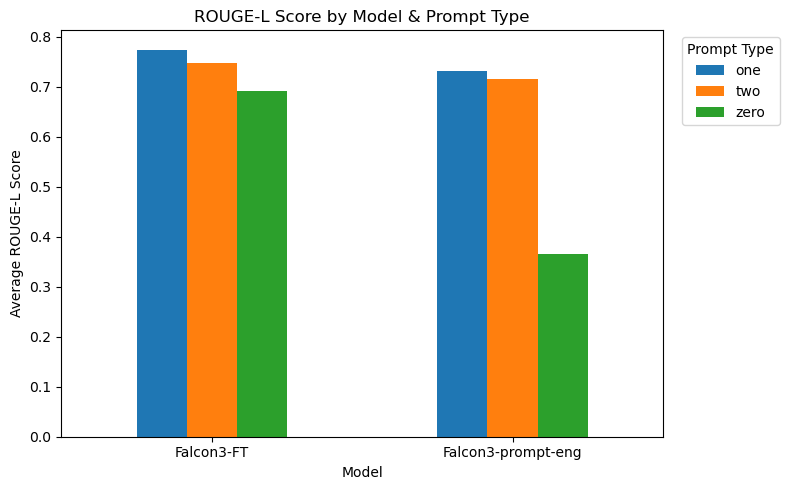

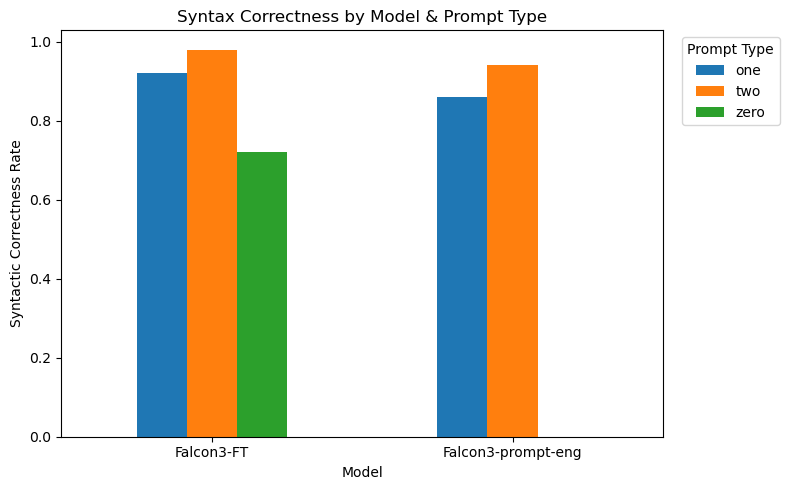

In [52]:
import matplotlib.pyplot as plt

# the two models you want, in the order to display
selected = [
    "Falcon3-Instruct-10B-3epochs",
    "Falcon3-Instruct-10B-prompt-eng"
]

# a nicer display name for each
rename_map = {
    "Falcon3-Instruct-10B-3epochs": "Falcon3-FT",
    "Falcon3-Instruct-10B-prompt-eng": "Falcon3-prompt-eng"
}

# pair each pivot with its y-label and plot title
to_plot = [
    (pivot_bleu,   "Average BLEU Score",             "BLEU Score by Model & Prompt Type"),
    (pivot_rouge,  "Average ROUGE-L Score",          "ROUGE-L Score by Model & Prompt Type"),
    (pivot_syntax, "Syntactic Correctness Rate",     "Syntax Correctness by Model & Prompt Type"),
]

for pivot, y_label, title in to_plot:
    # 1. filter & rename index
    df_plot = pivot.loc[selected].rename(index=rename_map)
    
    # 2. plot
    ax = df_plot.plot(
        kind="bar",
        figsize=(8, 5)
    )
    ax.set_title(title)
    ax.set_xlabel("Model")
    ax.set_ylabel(y_label)
    
    # 3. legend = prompt types
    ax.legend(title="Prompt Type", bbox_to_anchor=(1.02, 1), loc="upper left")
    
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
